In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib as mpl
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'

In [8]:
water = pd.read_csv('C:\\k_disital\\source\\mygit\\ML-First-Project\\data_city\\data_tr_city.csv')

In [9]:
water['target'] = water['구미 혁신도시배수지 유출유량 적산차']
water = water.drop('구미 혁신도시배수지 유출유량 적산차', axis=1)

In [10]:
water['datetime'] = water['datetime'].astype('datetime64[ns]')

In [11]:
water = water.set_index('datetime')
water

,target
datetime,
2017-01-01 01:00:00,138.0
2017-01-01 02:00:00,237.0
2017-01-01 03:00:00,128.0
2017-01-01 04:00:00,14.0
2017-01-01 05:00:00,11.0
...,...
2020-12-31 19:00:00,328.0
2020-12-31 20:00:00,347.0
2020-12-31 21:00:00,335.0


In [12]:
water.index = water.index.to_period('h')

In [13]:
water.index

PeriodIndex(['2017-01-01 01:00', '2017-01-01 02:00', '2017-01-01 03:00',
             '2017-01-01 04:00', '2017-01-01 05:00', '2017-01-01 06:00',
             '2017-01-01 07:00', '2017-01-01 08:00', '2017-01-01 09:00',
             '2017-01-01 10:00',
             ...
             '2020-12-31 14:00', '2020-12-31 15:00', '2020-12-31 16:00',
             '2020-12-31 17:00', '2020-12-31 18:00', '2020-12-31 19:00',
             '2020-12-31 20:00', '2020-12-31 21:00', '2020-12-31 22:00',
             '2020-12-31 23:00'],
            dtype='period[H]', name='datetime', length=35063)

In [1]:
String_strDT = "01-05 12";
DateTime_dt = DateTime.Parse( String_strDT )

Console.WriteLine(dt.DateTime_dt("MM-dd hh"))

NameError: name 'DateTime' is not defined

<AxesSubplot:xlabel='datetime'>

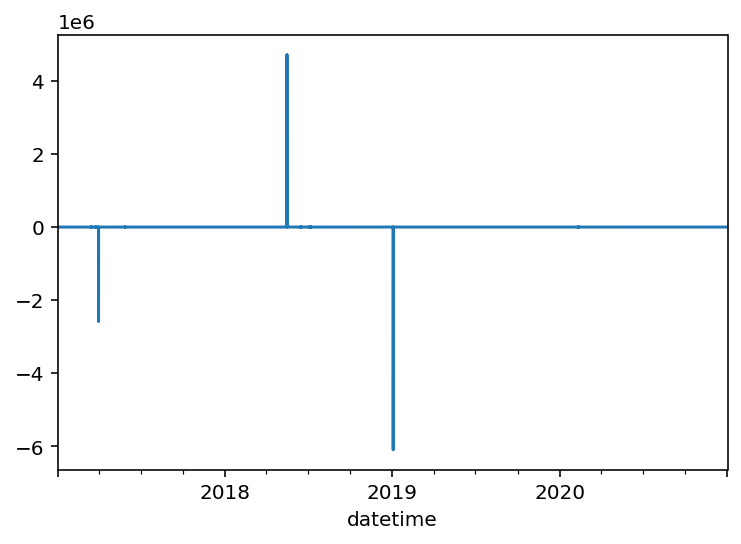

In [8]:
water.target.plot()

In [9]:
water.sort_values(by='target', ascending=False)

,target
datetime,
2018-05-15 20:00,4720655.0
2017-05-27 10:00,4999.0
2017-05-28 06:00,3357.0
2017-05-31 08:00,2591.0
2017-05-28 15:00,2550.0
...,...
2018-06-14 22:00,NaN
2018-07-04 12:00,NaN
2018-07-06 11:00,NaN


In [10]:
water.target = water.target.round(0)

In [11]:
# na 값 0으로 바꾸기
water.target.replace(np.NaN, 0, inplace=True)

<AxesSubplot:xlabel='datetime'>

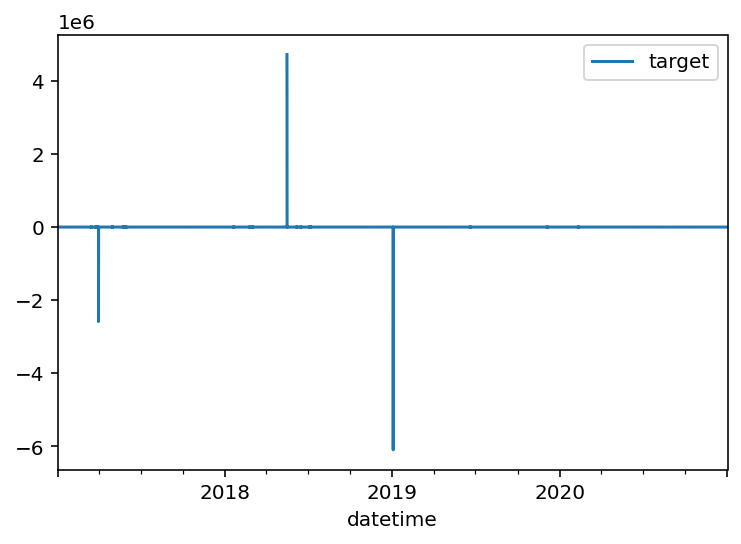

In [12]:
water.plot()

In [13]:
water[water.target == water.target.max()] = np.nan  # 위아래 평균값 넣기

In [14]:
# 최솟값 이상치가 2개라서 
for i in range(2):
    water[water.target == water.target.min()] = np.nan  # np.NaN

<AxesSubplot:xlabel='datetime'>

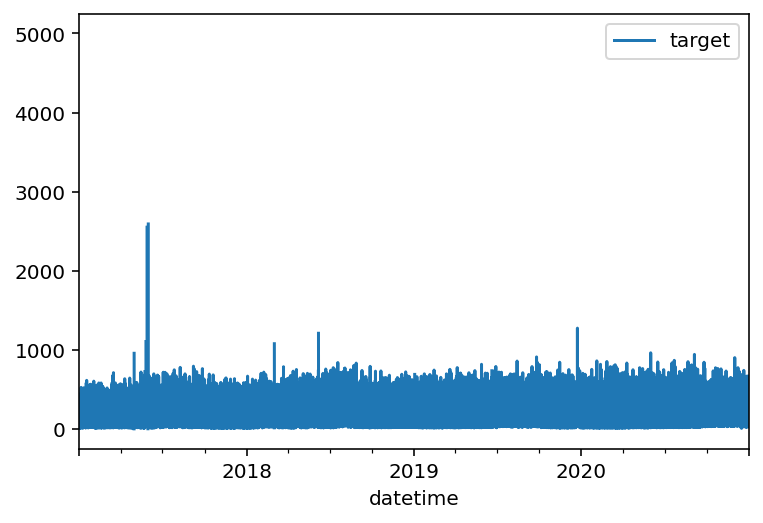

In [15]:
water.plot()

In [16]:
water[(water.index.year == 2017) & (water.index.month == 5) & (water.target.isna())]

,target
datetime,
2017-05-23 16:00,NaN
2017-05-23 18:00,NaN
2017-05-23 23:00,NaN
2017-05-24 21:00,NaN
2017-05-25 00:00,NaN
...,...
2017-05-31 03:00,NaN
2017-05-31 04:00,NaN
2017-05-31 05:00,NaN


### 5월 23일 결측치처리 - 진행중

In [17]:
print(water[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24) & (water.index.hour >= 14)])

                  target
datetime                
2017-05-23 14:00   684.0
2017-05-23 15:00   104.0
2017-05-23 16:00     NaN
2017-05-23 17:00   664.0
2017-05-23 18:00     NaN
2017-05-23 19:00   366.0
2017-05-23 20:00    56.0
2017-05-23 21:00   234.0
2017-05-23 22:00   486.0
2017-05-23 23:00     NaN
2017-05-24 14:00   303.0
2017-05-24 15:00   366.0
2017-05-24 16:00   154.0
2017-05-24 17:00   129.0
2017-05-24 18:00   171.0
2017-05-24 19:00   344.0
2017-05-24 20:00   175.0
2017-05-24 21:00     NaN
2017-05-24 22:00   670.0
2017-05-24 23:00   151.0


In [18]:
print(water[(water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour >= 15) & (water.index.hour <= 17)])

                  target
datetime                
2017-05-23 15:00   104.0
2017-05-23 16:00     NaN
2017-05-23 17:00   664.0
2018-05-23 15:00   227.0
2018-05-23 16:00   133.0
2018-05-23 17:00   402.0
2019-05-23 15:00    84.0
2019-05-23 16:00   228.0
2019-05-23 17:00   346.0
2020-05-23 15:00   456.0
2020-05-23 16:00   260.0
2020-05-23 17:00   147.0


In [19]:
# 17년 5월 23 15시~ 17시 sum
filled = water.target[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour >= 15) & (water.index.hour <= 17)].sum()

In [20]:
# 19년 5월 23일 15~ 17시 sum
## !! 2019로 정한 이유?
fill = water.target[(water.index.year == 2019) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour >= 15) & (water.index.hour <= 17)].sum()

In [21]:
print(filled, fill)

768.0 658.0


In [22]:
print((filled / fill).round(2))

1.17


In [23]:
water[water.index == '2017-05-23 16:00'] = water.target[water.index == '2019-05-23 16:00'] * 1.17
# 16시에 빠진값이 17시에 누적된 값이라서 같이 처리
water[water.index == '2017-05-23 17:00'] = water.target[water.index == '2019-05-23 17:00'] * 1.17

In [24]:
# 5월 23일 17시 ~ 19일
print(water[(water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (water.index.hour >= 17) & (water.index.hour <= 19)])

                  target
datetime                
2017-05-23 17:00  404.82
2017-05-23 18:00     NaN
2017-05-23 19:00  366.00
2018-05-23 17:00  402.00
2018-05-23 18:00  179.00
2018-05-23 19:00  369.00
2019-05-23 17:00  346.00
2019-05-23 18:00  145.00
2019-05-23 19:00  319.00
2020-05-23 17:00  147.00
2020-05-23 18:00  293.00
2020-05-23 19:00  520.00


In [25]:
# 17년을 채워야하는데 18,19,20년 중에 값이 줄어드느게 18년과 19년
filled = water.target[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour > 17) & (water.index.hour < 19)].sum()
fill_1 = water.target[(water.index.year == 2018) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour > 17) & (water.index.hour < 19)].sum()
fill_2 = water.target[(water.index.year == 2019) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day < 24) & (
    water.index.hour > 17) & (water.index.hour < 19)].sum()

In [26]:
# 19,20의 가중치
tot_fill = (fill_1+fill_2)/2

In [27]:
(filled/tot_fill).round(2)

0.0

In [28]:
# 18, 19 년 평균값 구하기
(water.target[water.index == '2018-05-23 18:00'][0] + water.target[
    water.index == '2019-05-23 18:00'][0])/2

162.0

In [29]:
# 17년 23일 값 구하기(19,20 평균값 * 가중치 )
water[water.index == '2017-05-23 18:00'] = ((
    water.target[water.index == '2018-05-23 18:00'][0] + water.target[
        water.index == '2019-05-23 18:00'][0]) / 2) * 0.88

<AxesSubplot:xlabel='datetime'>

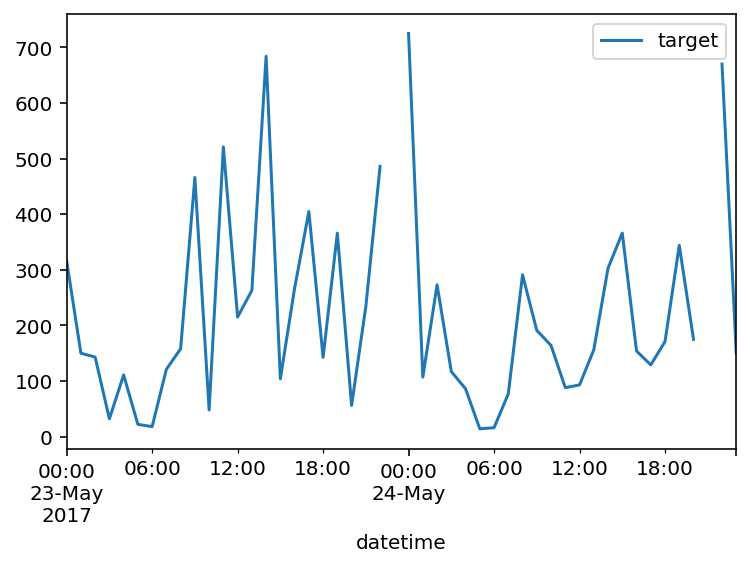

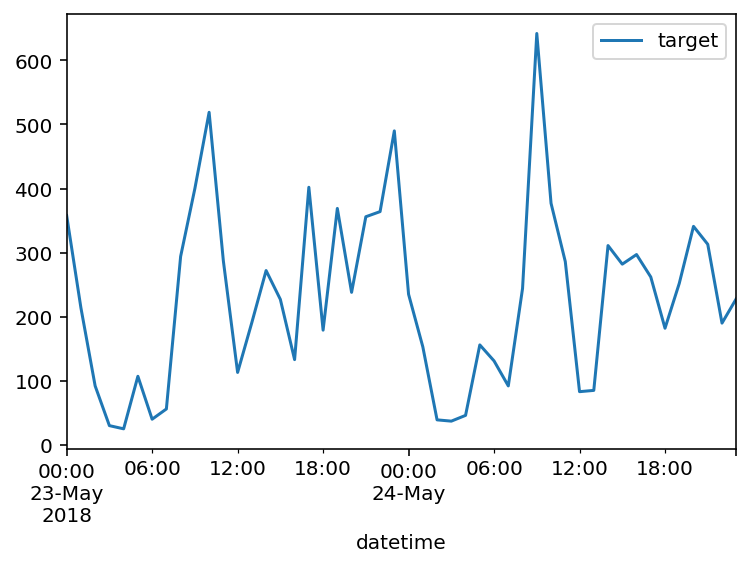

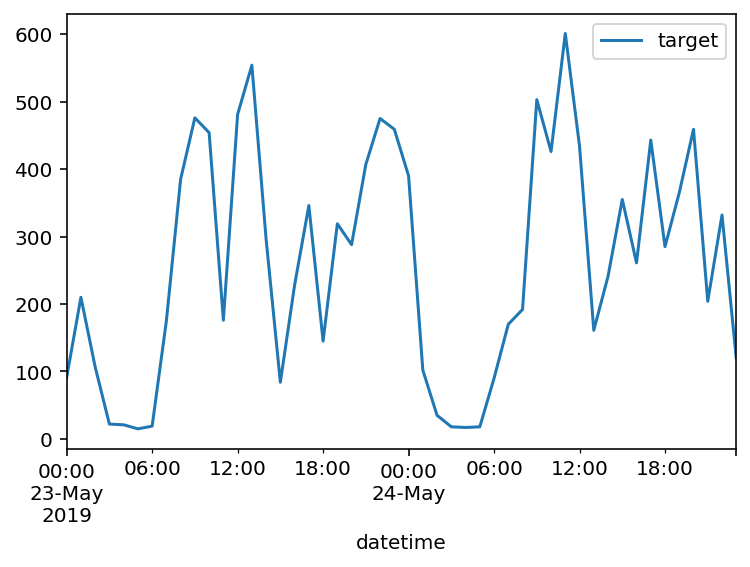

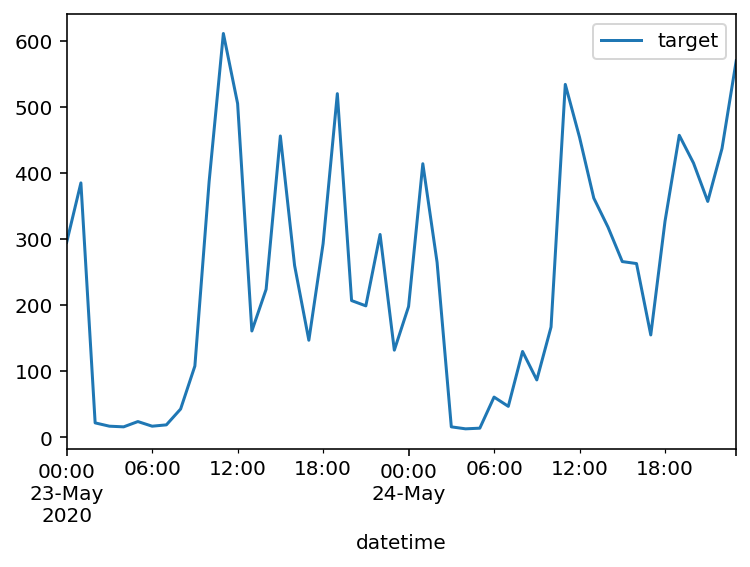

In [30]:
# 시각화
water[(water.index.year == 2017) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2018) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2019) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()
water[(water.index.year == 2020) & (water.index.month == 5) & (
    water.index.day >= 23) & (water.index.day <= 24)].plot()

In [31]:
water[(water.index.year == 2017) & (water.target.isna())]
# 보간법 일부 가능, 다른 년도의 값들을 보고 채워넣어야 할 듯.

,target
datetime,
2017-03-14 21:00,NaN
2017-03-24 15:00,NaN
2017-03-28 17:00,NaN
2017-03-30 16:00,NaN
2017-04-29 14:00,NaN
...,...
2017-05-31 03:00,NaN
2017-05-31 04:00,NaN
2017-05-31 05:00,NaN


In [32]:
# interpolate : 보간법 함수 (17년 3월 결측값 처리)
water[(water.index.year == 2017) & (water.index.month == 3)] = water[
    (water.index.year == 2017) & (water.index.month == 3)].interpolate()

In [33]:
water[(water.index.year == 2017) & (water.target.isna())]
# 3월만 보간법 사용

,target
datetime,
2017-04-29 14:00,NaN
2017-04-29 16:00,NaN
2017-04-29 17:00,NaN
2017-04-29 18:00,NaN
2017-04-29 19:00,NaN
...,...
2017-05-31 03:00,NaN
2017-05-31 04:00,NaN
2017-05-31 05:00,NaN


In [34]:
water[(water.index.year == 2018) & (water.target.isna())]
# 6월 6일의 결측값을 제외하고는 보간법이 가능함

,target
datetime,
2018-01-19 15:00,NaN
2018-02-23 17:00,NaN
2018-03-02 06:00,NaN
2018-03-02 07:00,NaN
2018-03-02 08:00,NaN
2018-05-15 19:00,NaN
2018-05-15 20:00,NaN
2018-06-06 04:00,NaN
2018-06-06 05:00,NaN


In [35]:
water[(water.index.year == 2018) & (water.index.month != 6)] = water[
    (water.index.year == 2018) & (water.index.month != 6)].interpolate()

In [36]:
water[(water.index.year == 2018) & (water.target.isna())]
# 6월 6일 제외한 값 보간법 사용

,target
datetime,
2018-06-06 04:00,NaN
2018-06-06 05:00,NaN
2018-06-06 06:00,NaN
2018-06-06 07:00,NaN
2018-06-06 08:00,NaN
2018-06-06 12:00,NaN
2018-06-06 13:00,NaN
2018-06-06 14:00,NaN
2018-06-06 15:00,NaN


In [37]:
water[(water.index.year == 2019) & (water.target.isna())]
# 보간법 사용가능

,target
datetime,
2019-01-02 15:00,NaN
2019-06-19 20:00,NaN
2019-12-04 19:00,NaN


In [38]:
water[(water.index.year == 2019)] = water[(water.index.year == 2019)].interpolate()

In [39]:
water[(water.index.year == 2019) & (water.target.isna())]
# 값 확인

,target
datetime,


In [40]:
water[(water.index.year == 2020) & (water.target.isna())]
# 각 결측치가 바로 붙어있긴 하지만 두개 밖에 없기 때문에 보간법 사용가능

,target
datetime,
2020-02-10 14:00,NaN
2020-02-10 15:00,NaN


In [41]:
water[(water.index.year == 2020)] = water[(water.index.year == 2020)].interpolate()

In [42]:
water[(water.index.year == 2020) & (water.target.isna())]
# 값 확인

,target
datetime,


In [43]:
water.target.isna().sum()

132

#### 2017 4월 
- 29일 14시 -> 창규한거 OR 보간법 ( 15시 누적된 값이라서 결측값 처리)
- 29일 16시 ~ 30일 10 까지 -> 모델사용 (30일 6시 누적값, 30일 7시 1도 이상치로 판단 -> 결측값 처리)

In [44]:
# 2017 4월 결측치
water[(water.index.year == 2017) & (water.index.month == 4) & (water.target.isna())]

,target
datetime,
2017-04-29 14:00,NaN
2017-04-29 16:00,NaN
2017-04-29 17:00,NaN
2017-04-29 18:00,NaN
2017-04-29 19:00,NaN
2017-04-29 20:00,NaN
2017-04-29 21:00,NaN
2017-04-29 22:00,NaN
2017-04-29 23:00,NaN


#### 29일 14시 (미완) 지금 함수 만드는 중


In [45]:
# water[(water.index.year == 2017) & (water.index.month == 3)] = water[
#     (water.index.year == 2017) & (water.index.month == 3)].interpolate()

In [46]:
# water[(water.index.year == 2017) & (water.target.isna())]
# # 3월만 보간법 사용
!!

[]

#### 17년 4월 29일 16시 ~ 30일 10시

In [47]:
# 결측값 만들기
## (30일 6시 누적값, 30일 7시 1도 이상치로 판단 -> 결측값 처리)
water[(water.index =='2017-04-30 6:00')|
      (water.index =='2017-04-30 7:00')] = np.NaN

In [48]:
# 넘파이 버전 낮추기
#!pip install numpy==1.20.3

In [54]:
print(np.__version__)

1.20.3


In [49]:
import  scipy.signal.signaltools
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

In [52]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [51]:
# # step 1: data specification
# y = water

# # step 2: specifying forecasting horizon
# fh = np.arange(1, 37)

# # step 3: specifying the forecasting algorithm
# forecaster = NaiveForecaster(strategy="last", sp=12)

# # step 4: fitting the forecaster
# forecaster.fit(y)

# # step 5: querying predictions
# y_pred = forecaster.predict(fh)

In [63]:
water[water.index.year == 2020]

,target
datetime,
2020-01-01 00:00,233.0
2020-01-01 01:00,40.0
2020-01-01 02:00,67.0
2020-01-01 03:00,151.0
2020-01-01 04:00,18.0
...,...
2020-12-31 19:00,328.0
2020-12-31 20:00,347.0
2020-12-31 21:00,335.0


In [99]:
from sktime.forecasting.all import *

y = water[(water.index.year == 2020)]
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=24)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

In [118]:
# 평가 1 / 낮을수록 좋음

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

AttributeError: 'function' object has no attribute 'get_tag'

In [115]:
# 평가 2

from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape.get_tag("lower_is_better")
mape(y_test, y_pred)

0.5100257466053503

In [100]:
y_pred

,target
datetime,
2020-10-01 12:00,408.605784
2020-10-01 13:00,364.551020
2020-10-01 14:00,315.885737
2020-10-01 15:00,283.129392
2020-10-01 16:00,250.631060
...,...
2020-12-31 19:00,383.302480
2020-12-31 20:00,475.447149
2020-12-31 21:00,476.156429


In [105]:
b = y_pred[(y_pred.index.year == 2020) & (y_pred.index.month == 10) &(y_pred.index.day == 2)&(y_pred.index.hour >= 0)]

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

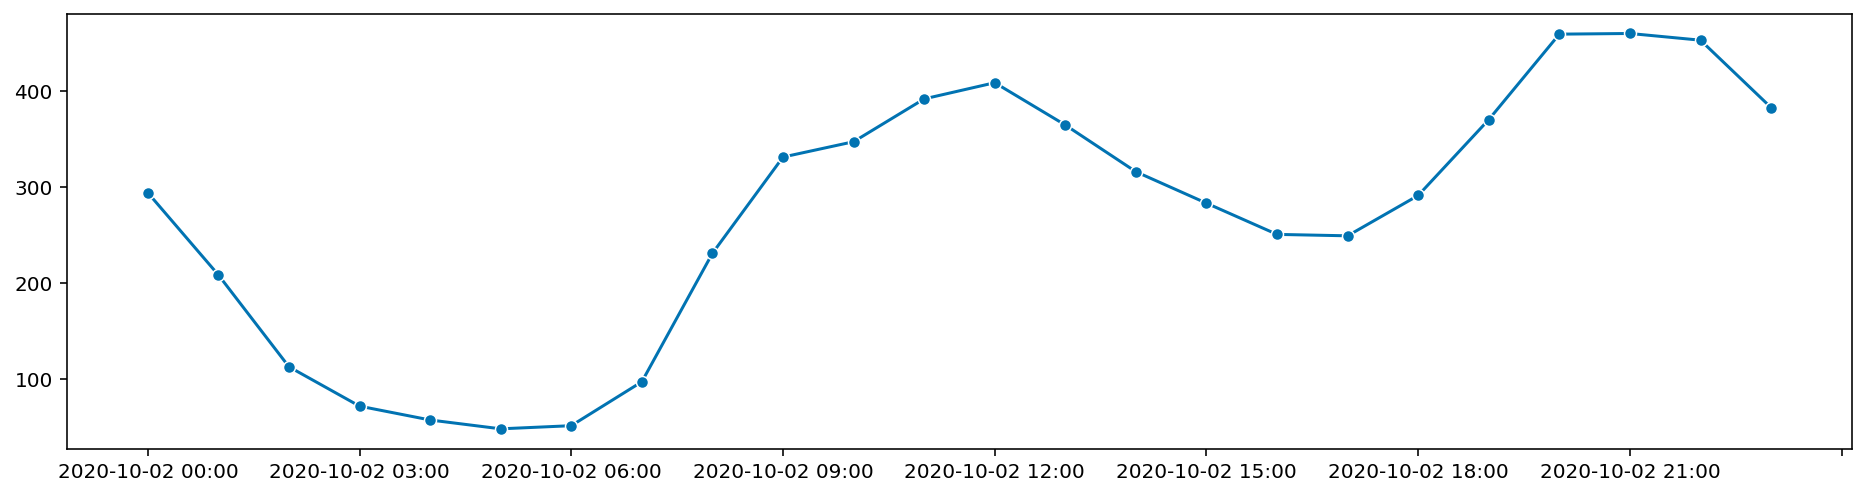

In [106]:
plot_series(b)

In [103]:
a = water[(water.index.year == 2020) & (water.index.month == 10) &(water.index.day == 2)&(water.index.hour >= 0)]

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

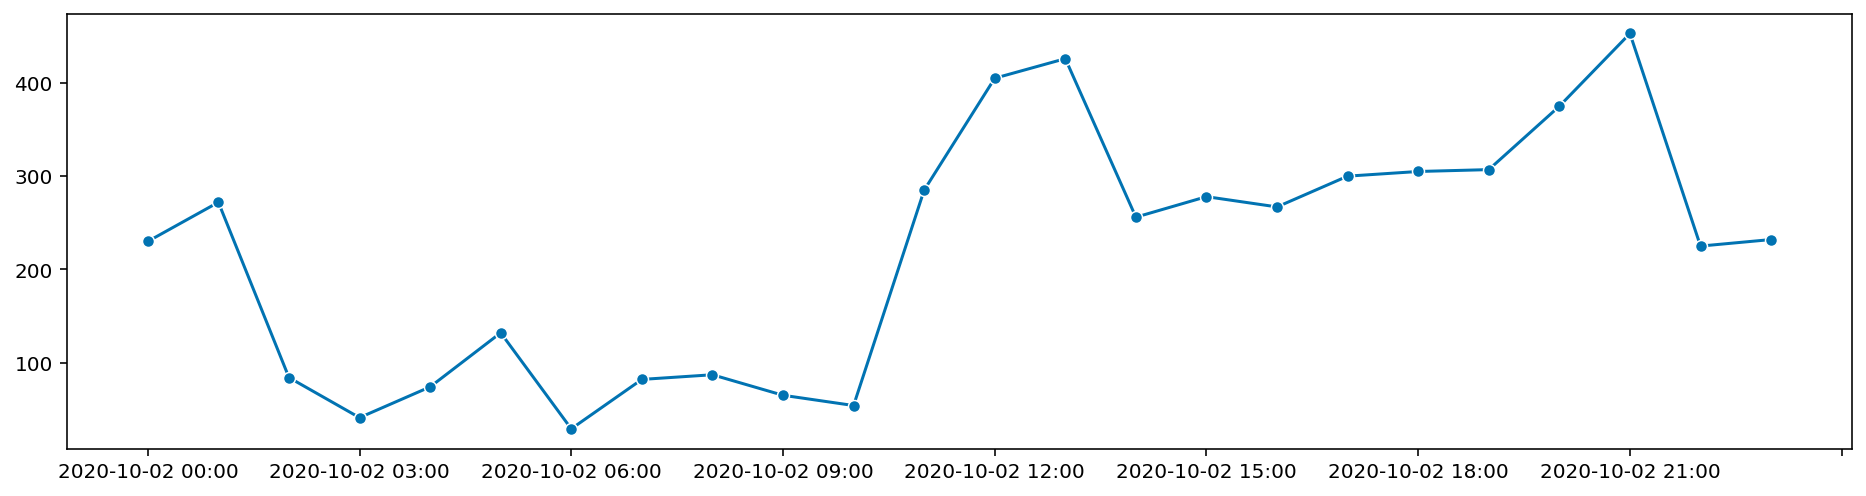

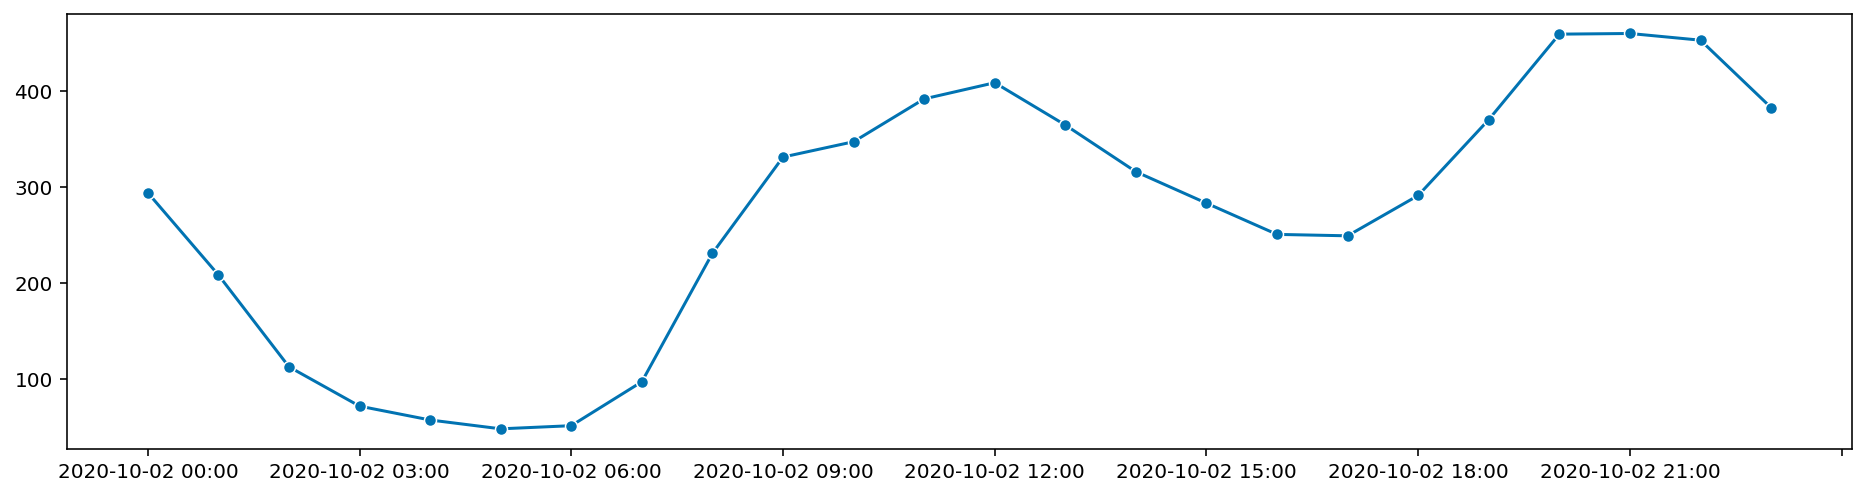

In [107]:
figure = (2,1,2)
plot_series(a)
plot_series(b)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

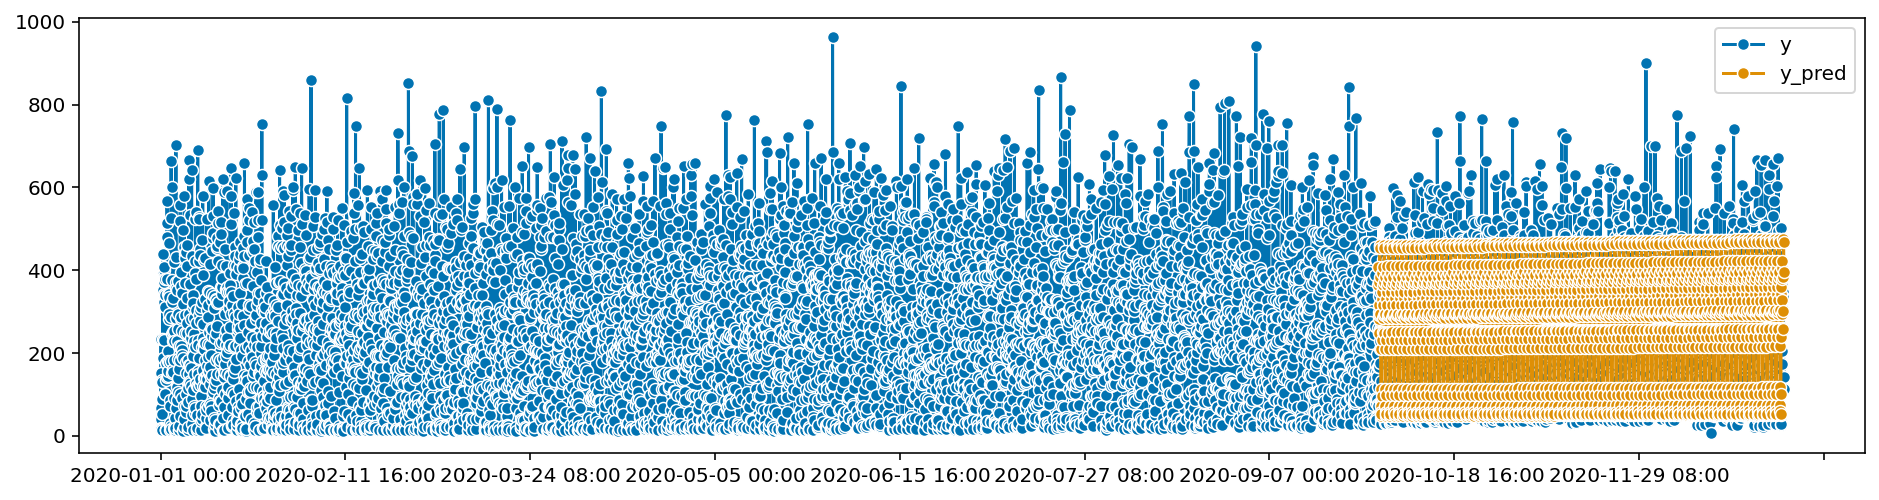

In [79]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [76]:
from sktime.forecasting.naive import NaiveForecaster

In [77]:
from sktime.performance_metrics.forecasting import smape_loss

ImportError: cannot import name 'smape_loss' from 'sktime.performance_metrics.forecasting' (C:\Anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\__init__.py)

In [66]:
smape_loss(y_test, y_pred)

NameError: name 'smape_loss' is not defined

In [108]:
y.index[-1]

Period('2020-12-31 23:00', 'H')